# FUZZY C MEANS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import calendar


warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
#load fraudulent profile 1375
badguy_1 = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Cases/Case7/Case7.xlsx')
badguy_1["date"] = badguy_1["day"] +['-']+ badguy_1["time"]
badguy_2 = badguy_1.rename(columns={"power": "power_real", "FD5": "power_fraud"})
badguy_3=badguy_2.drop(['day','time','Unnamed: 0','smart meter'], axis=1)

badguy_3['date'] = pd.to_datetime(badguy_3['date'],format='%Y-%m-%d-%H:%M')
#badguy_1['date'] = datetime(badguy_1['date'],format='%Y-%m-%d-%H:%M')
#badguy_1['date'] = pd.to_datetime(badguy_1['date'],format='%Y-%m-%d-%H:%M')
#badguy_1['date'] = pd.to_datetime(badguy_1['date'],format='%Y-%m-%d-%H:%M')
#badguy_1['date'] = datetime.datetime.strptime(badguy_1['date'], '%Y-%m-%d %H:%M:%S.%f')
#badguy_1['day'] = cr_date.strftime("%m/%d/%Y")
#badguy_1['day'] = badguy['date'].apply(lambda x:x.strftime('%YYYY-mm-dd'))
#badguy['time'] = badguy['date'].apply(lambda x:x.strftime('%HH:%MM'))
#badguy_1 = badguy.drop(['date'], axis=1)

print (badguy_3)

      power_real  power_fraud                date
0          0.137        0.137 2020-06-02 00:00:00
1          0.137        0.137 2020-06-02 01:00:00
2          0.135        0.135 2020-06-02 02:00:00
3          0.453        0.453 2020-06-02 03:00:00
4          0.379        0.379 2020-06-02 04:00:00
...          ...          ...                 ...
3644       0.896        0.896 2020-10-31 19:00:00
3645       1.146        1.146 2020-10-31 20:00:00
3646       1.112        1.112 2020-10-31 21:00:00
3647       1.510        1.510 2020-10-31 22:00:00
3648       1.826        1.826 2020-10-31 23:00:00

[3649 rows x 3 columns]


In [3]:
badguy_3.dtypes

power_real            float64
power_fraud           float64
date           datetime64[ns]
dtype: object

In [4]:
#SELECT SMALLER DATASET
badguy = badguy_3[:720]
print(badguy)

     power_real  power_fraud                date
0         0.137        0.137 2020-06-02 00:00:00
1         0.137        0.137 2020-06-02 01:00:00
2         0.135        0.135 2020-06-02 02:00:00
3         0.453        0.453 2020-06-02 03:00:00
4         0.379        0.379 2020-06-02 04:00:00
..          ...          ...                 ...
715       0.860        0.860 2020-07-01 19:00:00
716       0.605        0.605 2020-07-01 20:00:00
717       1.102        1.102 2020-07-01 21:00:00
718       0.698        0.698 2020-07-01 22:00:00
719       1.234        1.234 2020-07-01 23:00:00

[720 rows x 3 columns]


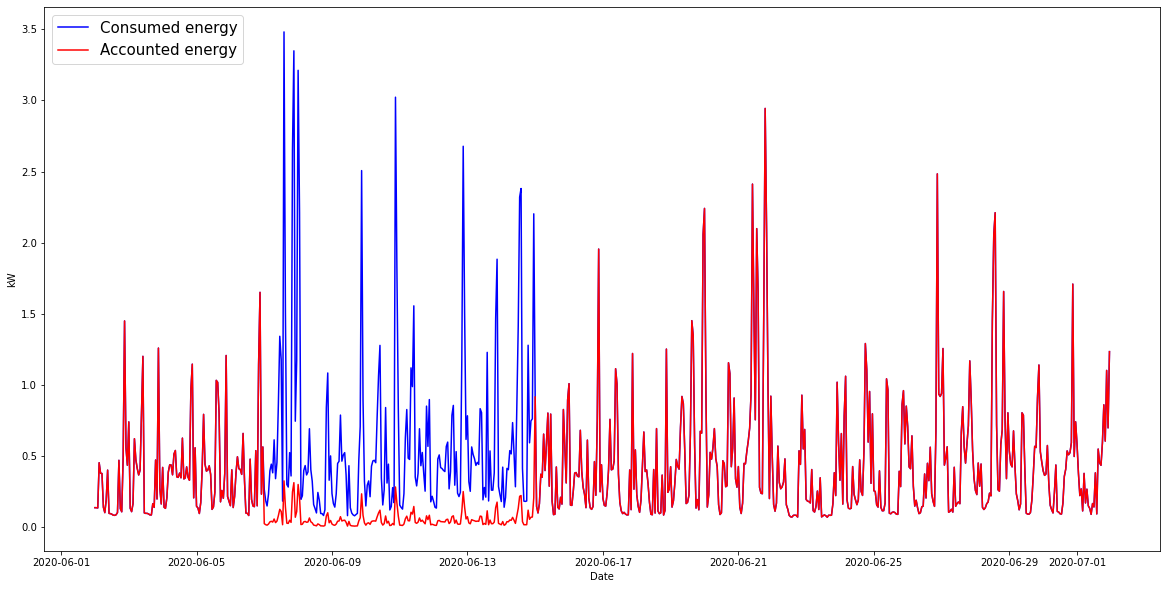

In [5]:
plt.figure(figsize=(20,10))
plt.plot(badguy['date'], badguy['power_real'], 'b', label='Consumed energy')
plt.plot(badguy['date'], badguy['power_fraud'], 'r', label='Accounted energy')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

In [6]:
df_bg=badguy.copy()

df_bg['day'] = df_bg['date'].apply(lambda x:x.strftime('%Y%m%d'))

df_bg['time'] = df_bg['date'].apply(lambda x:x.strftime('%H:%M'))

df_bg = df_bg.drop(['date', 'power_real'], axis=1)
df_bg.head()

,power_fraud,day,time
0,0.137,20200602,00:00
1,0.137,20200602,01:00
2,0.135,20200602,02:00
3,0.453,20200602,03:00
4,0.379,20200602,04:00


# Fuzzy C-Means

In [7]:
#https://github.com/omadson/fuzzy-c-means/blob/master/fcmeans/fcm.py

In [8]:
pip install fuzzy-c-means

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [10]:
#CREATE COPY OF THE DATA
df_cluster=df_bg.copy()

In [11]:
list_days=df_bg['day'].unique()
n=df_bg['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20200602', '20200603', '20200604', '20200605', '20200606',
       '20200607', '20200608', '20200609', '20200610', '20200611',
       '20200612', '20200613', '20200614', '20200615', '20200616',
       '20200617', '20200618', '20200619', '20200620', '20200621',
       '20200622', '20200623', '20200624', '20200625', '20200626',
       '20200627', '20200628', '20200629', '20200630', '20200701'],
      dtype=object)

In [12]:
def find_peaks(day, nb_samples):
    daily_max_function = []
    
    for i in range(1,23):    #Look at the second day and the second last one so I can compare i-1, i, i+1
        if i==1 and day[i]>day[i+1]:
            daily_max_function.append(day[i])
        else:
            if i==23 and day[i+1]>day[i]:
                daily_max_function.append(day[i+1])
            if day[i]>day[i-1] and day[i]>day[i+1]:
                daily_max_function.append(day[i])
            
    daily_max_function.sort(reverse = True)
    final_average = sum(daily_max_function[0:nb_samples])/nb_samples
    return(final_average)

In [13]:
#WEEK OR WEEKEND FEATURE
 
import datetime 
import calendar 

def findDay(day): 
    date = datetime.datetime.strptime(day,"%Y%m%d").weekday()
    return (calendar.day_name[date])

def TypeDay(day):
    if findDay(day) == 'Saturday' or findDay(day) == 'Sunday' :
        day_type = 1
    else:
        day_type = 0
    return(day_type)


In [14]:
#CUTS FUNCTION
def cuts(df,mean):
    power = df.iloc[0]['power_fraud']
    above = True
    above_0 = (power>mean)
    prev_above = above_0
    cuts = 0
    i=0
    for index, row in df.iterrows():
        if i!=0:
            power = row['power_fraud']
            above = power>mean
            if above!=prev_above:
                cuts += 1
                above = (power>mean)
            prev_above=above
            i+=1
        else:
            i+=1
    if above_0!=above:
        cuts += 1    
    return (cuts)

In [15]:
#SLOPES FUNCTION
def deep_slopes(df, mean):
    power = df.iloc[0]['power_fraud']
    previous_p = power
    inc = 0
    dec = 0
    power_0 = power
    for index, row in df.iterrows():
        #print(power, inc, dec)
        power = row['power_fraud']
        if power>(previous_p+0.5*mean):
            inc += 1
        elif power<(previous_p-0.5*mean):
            dec += 1
        previous_p = power
    if power_0>(previous_p+0.5*mean):
        inc += 1
    elif power_0>(previous_p-0.5*mean):
        dec += 1
    return (inc,dec)

In [16]:
#FEATURES SELECTION DROPPING DATES
df = pd.DataFrame(columns=['date','mean','median','std','max', 'min', 'mean_p1','mean_p2','mean_p3','n_cuts',
                           'inc','dec','peaks_avg'])

df_cluster['datetime'] =  pd.to_datetime(df_cluster['time'], format='%H:%M')

for day in list_days:

    daily_ref = df_cluster[df_cluster['day'] == day]
    
    mean = daily_ref['power_fraud'].mean()
    
    median = daily_ref['power_fraud'].median()
    
    std = daily_ref['power_fraud'].std()
    
    maxim = daily_ref['power_fraud'].max()
    
    minim = daily_ref['power_fraud'].min()
    
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power_fraud'].mean()
    
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power_fraud'].mean()
    
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power_fraud'].mean()
    
    n_cuts = cuts(daily_ref,mean)
    
    inc, dec = deep_slopes(daily_ref,mean)
    
    peak = find_peaks(list(daily_ref['power_fraud']), 2)
    
    df = df.append({'date':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df
df_date = df_features.iloc[:, 0]

df_features.drop(['date'], axis = 1, inplace = True)

df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.280542,0.1370,0.297485,1.450,0.083,0.232500,0.134000,0.519857,8,5,4,0.9600
1,0.360292,0.1815,0.341725,1.259,0.086,0.377750,0.352571,0.381571,8,6,4,1.2300
2,0.429417,0.3740,0.229021,1.146,0.132,0.316250,0.419286,0.568714,10,3,4,0.8860
3,0.407167,0.3150,0.321833,1.207,0.096,0.323375,0.480857,0.374286,8,4,6,1.1195
4,0.395417,0.3500,0.359119,1.651,0.082,0.325625,0.277000,0.632286,14,7,6,1.1550


In [17]:
# Importing StandardScaler method for SkLearn 
from sklearn.preprocessing import StandardScaler

# Creating the instance for Standard Scaler 
scaler = StandardScaler()

# Fitting the scaler with meter_stat
scaler.fit(df_features)

# Transforming the meter_stat df into an scaled one. 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,-0.259277,-0.684110,0.064677,0.360304,0.220504,-0.211053,-0.589956,0.180365,0.147764,-0.049752,-0.500000,0.080819
1,0.125551,-0.411651,0.311155,0.100580,0.294558,0.665842,0.182248,-0.288863,0.147764,0.696526,-0.500000,0.554491
2,0.459108,0.766962,-0.316767,-0.053078,1.430039,0.294558,0.417947,0.346146,1.034345,-1.542308,-0.500000,-0.049003
3,0.351743,0.405725,0.200327,0.029870,0.541401,0.337572,0.635476,-0.313585,0.147764,-0.796030,1.166667,0.360636
4,0.295044,0.620018,0.408063,0.633626,0.195820,0.351156,-0.084743,0.561855,2.807507,1.442804,1.166667,0.422915


In [18]:
new_df = df_features_scaled.to_numpy()
new_df

array([[-0.25927729, -0.68411007,  0.06467709,  0.36030426,  0.22050436,
        -0.21105332, -0.58995635,  0.18036483,  0.14776353, -0.04975186,
        -0.5       ,  0.08081856],
       [ 0.12555059, -0.41165139,  0.31115487,  0.10058023,  0.29455751,
         0.6658419 ,  0.18224772, -0.28886301,  0.14776353,  0.69652603,
        -0.5       ,  0.55449097],
       [ 0.45910829,  0.76696199, -0.31676677, -0.05307849,  1.43003914,
         0.29455752,  0.41794661,  0.34614574,  1.03434472, -1.54230764,
        -0.5       , -0.04900277],
       [ 0.35174252,  0.40572464,  0.20032668,  0.02987002,  0.54140134,
         0.33757218,  0.63547599, -0.31358472,  0.14776353, -0.79602975,
         1.16666667,  0.36063615],
       [ 0.29504374,  0.62001798,  0.40806302,  0.6336264 ,  0.19581997,
         0.35115575, -0.0847431 ,  0.56185481,  2.80750709,  1.44280393,
         1.16666667,  0.4229153 ],
       [-1.21083428, -1.26580152, -1.09054584, -1.16907598, -1.48469104,
        -1.42659205, -

In [19]:
df_features_scaled.dtypes

mean         float64
median       float64
std          float64
max          float64
min          float64
mean_p1      float64
mean_p2      float64
mean_p3      float64
n_cuts       float64
inc          float64
dec          float64
peaks_avg    float64
dtype: object

In [20]:
#GITHUB EXAMPLE TO CHECK TYPE FCM WORKS WITH AND IF IT WORKS WITH DIFFERENT ARRAY DIMENSIONS

#n_samples = 3000

#X = np.concatenate((
    #np.random.normal((-2, -2), size=(n_samples, 2)),
    #np.random.normal((2, 2), size=(n_samples, 2))
#))

#X = [[3, 2, 1], [3, 3, 2], [3, 4, 5], [3, 4, 5]] #ex to chech if FCM accept array type [[a b c], [d e f]]. It does

#X_np = np.asarray(X)
#print (X_np)
#type(X_np)

In [21]:
#FCM

fcm = FCM(n_clusters=2)

fcm.fit(new_df)

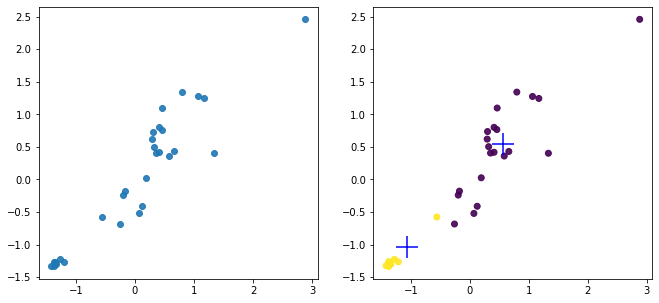

In [22]:
#PLOTTING THE RESULTS

fcm_centers = fcm.centers
fcm_labels = fcm.predict(new_df)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(new_df[:,0], new_df[:,1], alpha=.9)
axes[1].scatter(new_df[:,0], new_df[:,1], c=fcm_labels, alpha=.9)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='b', label = 'group 1')

#plt.savefig('images/basic-clustering-output.jpg')
plt.show()

In [23]:
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.6652047  0.33479527]
 [0.84147173 0.15852828]
 [0.7894108  0.21058917]
 [0.8500936  0.14990646]
 [0.7509497  0.2490503 ]
 [0.02796725 0.9720328 ]
 [0.07350267 0.92649734]
 [0.08460415 0.91539586]
 [0.07535508 0.9246449 ]
 [0.06800644 0.9319935 ]
 [0.03812474 0.9618752 ]
 [0.13891451 0.8610855 ]
 [0.11830542 0.88169456]
 [0.67876583 0.32123414]
 [0.92941004 0.07058998]
 [0.905346   0.09465402]
 [0.7109733  0.2890267 ]
 [0.9143965  0.08560343]
 [0.8534869  0.1465131 ]
 [0.72449887 0.27550113]
 [0.53381294 0.4661871 ]
 [0.35394827 0.6460517 ]
 [0.7827084  0.21729156]
 [0.6984634  0.30153665]
 [0.89745885 0.10254116]
 [0.9156027  0.0843973 ]
 [0.819123   0.18087697]
 [0.8782631  0.12173687]
 [0.77751213 0.22248782]
 [0.7041261  0.29587385]]


(30, 2)

In [24]:
#PROBABILITY TO BELONG TO GROUP 1 OR 0
fuzzy_results = [] 
percentage = 0.5 #to choose
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['Fuzzy C means probability to belong to group 0 or 1']
print(fuzzy_r_frame)
#type(fuzzy_r_frame)

    Fuzzy C means probability to belong to group 0 or 1
0                                                   1  
1                                                   1  
2                                                   1  
3                                                   1  
4                                                   1  
5                                                   0  
6                                                   0  
7                                                   0  
8                                                   0  
9                                                   0  
10                                                  0  
11                                                  0  
12                                                  0  
13                                                  1  
14                                                  1  
15                                                  1  
16                                              

In [25]:
print (df_date)
type(df_date)

0     20200602
1     20200603
2     20200604
3     20200605
4     20200606
5     20200607
6     20200608
7     20200609
8     20200610
9     20200611
10    20200612
11    20200613
12    20200614
13    20200615
14    20200616
15    20200617
16    20200618
17    20200619
18    20200620
19    20200621
20    20200622
21    20200623
22    20200624
23    20200625
24    20200626
25    20200627
26    20200628
27    20200629
28    20200630
29    20200701
Name: date, dtype: object


pandas.core.series.Series

In [26]:
df_new = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (df_new)

        date  Fuzzy C means probability to belong to group 0 or 1
0   20200602                                                  1  
1   20200603                                                  1  
2   20200604                                                  1  
3   20200605                                                  1  
4   20200606                                                  1  
5   20200607                                                  0  
6   20200608                                                  0  
7   20200609                                                  0  
8   20200610                                                  0  
9   20200611                                                  0  
10  20200612                                                  0  
11  20200613                                                  0  
12  20200614                                                  0  
13  20200615                                                  1  
14  202006

In [27]:
df_new = df_new.rename(columns={"date":"day", "Fuzzy C means probability to belong to group 0 or 1": "label"})
df_new

,day,label
0,20200602,1
1,20200603,1
2,20200604,1
3,20200605,1
4,20200606,1
5,20200607,0
6,20200608,0
7,20200609,0
8,20200610,0
9,20200611,0


In [28]:
df_labelled = pd.merge(df_bg, df_new, on='day')
df_labelled.head()

,power_fraud,day,time,label
0,0.137,20200602,00:00,1
1,0.137,20200602,01:00,1
2,0.135,20200602,02:00,1
3,0.453,20200602,03:00,1
4,0.379,20200602,04:00,1


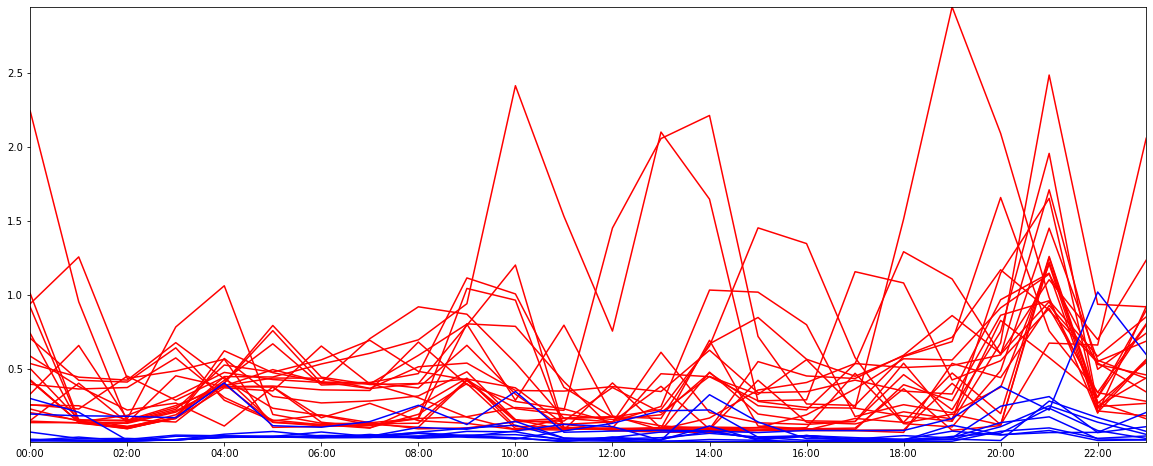

In [29]:
list_labels = df_labelled['label'].unique()
plt.figure(figsize=(20,8))

for label in list_labels:
    df_label = df_labelled.loc[df_labelled['label']==label]
    list_dates = df_label['day'].unique()
    for date in list_dates:
        df_label_date = df_label.loc[df_label['day']==date]
        if label==0:
            plt.plot(df_label_date['time'],df_label_date['power_fraud'],'b')
        else:
            plt.plot(df_label_date['time'],df_label_date['power_fraud'],'r')

plt.xticks(np.arange(0, 48, step=2))
plt.margins(x=0, y=0)
plt.show()             